In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [7]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


### 1. What is Neural Network ? What are the steps required to build a neural network?




Neural network is a series of algorithms that were used to learn underlying information in the data. NN mimics the way how neurons in the brain works. NN can be performed on images, voice,data and other types. Simple Neural network includes 3 layers. Initially, input layer which consists of various inputs(variables) are taken, then some NN algorithms assigns weights automatically for each input. Summation of all the inputs and weights together, will be send to the hidden layer. Hidden layers can vary from 1 to many. These layers signify the complexity of the model. After processing the data will be send to ouput.

Neutrons in the network are connected to each other either lateral,forward connection. Every neuron is associated with activation function. Activation functions such as tanh, relu,sigmoid are used to work non-linear data. Neurons output is dependent on the funcation.

Steps involved to build a NN:
1. Specify architecture : That includes number of layers, nodes in each layer, type of activation to use in each layer.
2. Compile the model : specifying optimizer like Adam,loss function like mean squared error for regression and entory loss for classification.
3. fit the model: apply backword propogation and gradient descent
4. Predict :  Predict the accuracy of the model.

### 2. Generally how do you check the performance of a neural network? why?

Performace of the neural network is measured through its low losses in training,validation and test data. Along with high accuracy values.

To achieve best perforamnce we have to fine tune hyperparameter:
1. Learning rate
2. optimizers  
3. loss funcations
4. number of epochs
5. Activation funcation

Along with tuning we can also try with transfer learning ( using pretrained model and try them on unseen data) and balance the data. 



### Preprocessing for Abalone:

In [8]:
abalone_df = pd.read_table("/content/drive/My Drive/Abalone/abalone.data", sep=",",header=None)
abalone_df.columns=['sex','length','diameter','height','whole_wt','shucked_wt','viscera_wt','shell_wt','rings']
abalone_df

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [9]:
abalone_df.describe()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
# Check for datatypes:
abalone_df.dtypes

abalone_df.info()
#dataset has no nulls.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         4177 non-null   object 
 1   length      4177 non-null   float64
 2   diameter    4177 non-null   float64
 3   height      4177 non-null   float64
 4   whole_wt    4177 non-null   float64
 5   shucked_wt  4177 non-null   float64
 6   viscera_wt  4177 non-null   float64
 7   shell_wt    4177 non-null   float64
 8   rings       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [11]:
# check for variable diversity:

abalone_df.nunique()

sex              3
length         134
diameter       111
height          51
whole_wt      2429
shucked_wt    1515
viscera_wt     880
shell_wt       926
rings           28
dtype: int64

In [12]:
# Check for diversity of the target variable.

abalone_df['rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

In [13]:
abalone_df[abalone_df['sex']== 'I']

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
16,I,0.355,0.280,0.085,0.2905,0.0950,0.0395,0.115,7
21,I,0.380,0.275,0.100,0.2255,0.0800,0.0490,0.085,10
42,I,0.240,0.175,0.045,0.0700,0.0315,0.0235,0.020,5
...,...,...,...,...,...,...,...,...,...
4158,I,0.480,0.355,0.110,0.4495,0.2010,0.0890,0.140,8
4163,I,0.390,0.310,0.085,0.3440,0.1810,0.0695,0.079,7
4164,I,0.390,0.290,0.100,0.2845,0.1255,0.0635,0.081,7
4165,I,0.405,0.300,0.085,0.3035,0.1500,0.0505,0.088,7


In [14]:
# Check for diversity of the abalone sex variable.

abalone_df['sex'].unique()

array(['M', 'F', 'I'], dtype=object)

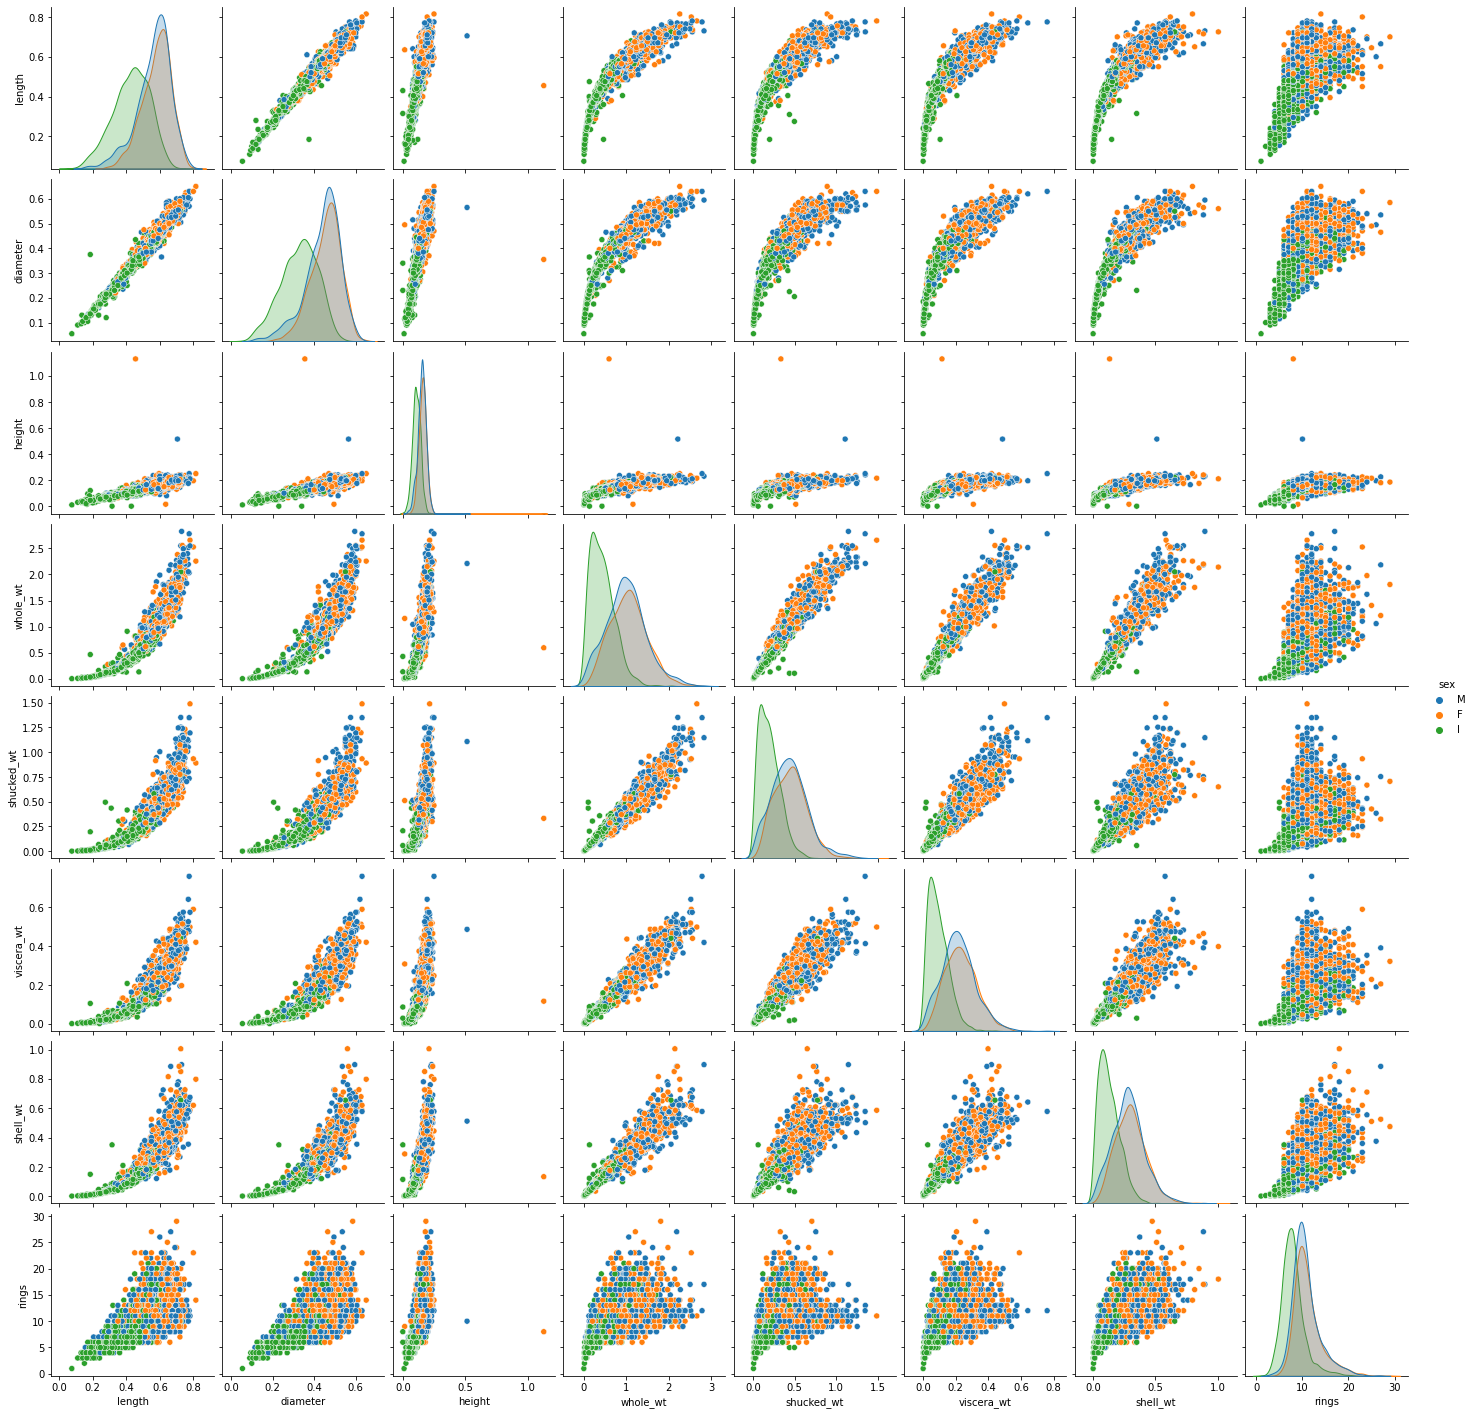

In [15]:
# Pair plot:

sns.pairplot(abalone_df, hue='sex',diag_kind='kde')

In [16]:
# Converting categorical variable to numerical:

le=LabelEncoder()

abalone_df['sex_c']=le.fit_transform(abalone_df['sex'])
abalone_df

# Drop sex variable after encoding:
abalone_df.drop('sex',axis=1,inplace=True)



In [17]:
# Some outliers has been identified hence removing outliers using zscore greater than 3.

from scipy import stats
z = np.abs(stats.zscore(abalone_df))  
threshold = 3
aba_df = abalone_df[(z < 3).all(axis=1)]    
aba_df

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,sex_c
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0


In [18]:
# check for dataset charectors after droping nulls:

aba_df.describe()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,sex_c
count,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000
mean,0.520987,0.405300,0.138002,0.802805,0.349099,0.175718,0.230676,9.738763,1.051403
std,0.115910,0.095903,0.036878,0.456192,0.206406,0.103350,0.127939,2.864691,0.818071
min,0.165000,0.115000,0.015000,0.014500,0.005500,0.000500,0.005000,3.000000,0.000000
25%,0.450000,0.345000,0.115000,0.438000,0.182000,0.091750,0.127750,8.000000,0.000000
50%,0.540000,0.420000,0.140000,0.783000,0.329500,0.167000,0.225000,9.000000,1.000000
75%,0.610000,0.480000,0.165000,1.131250,0.493500,0.246500,0.320000,11.000000,2.000000
max,0.760000,0.605000,0.250000,2.238500,1.017000,0.492500,0.655000,19.000000,2.000000


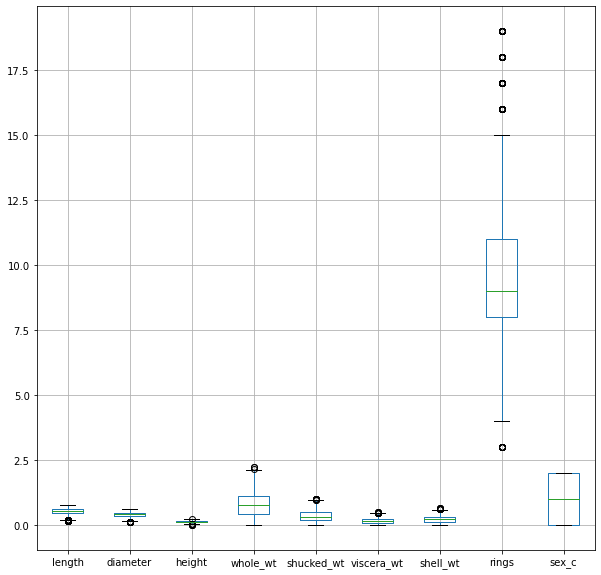

In [19]:
aba_df.boxplot(figsize=(10,10))

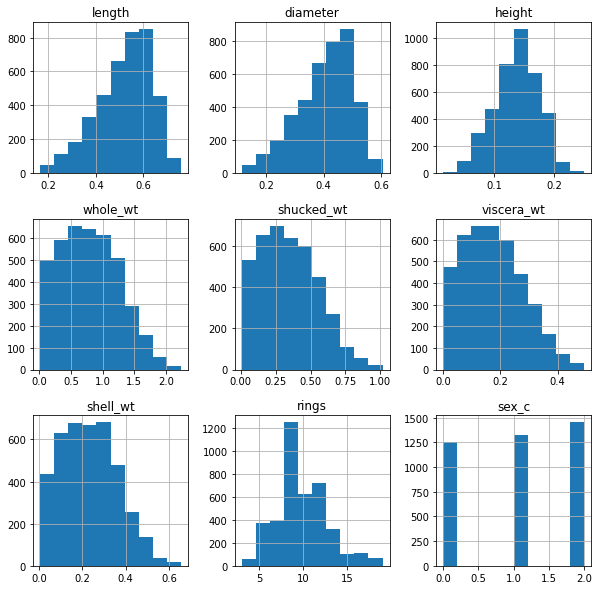

In [20]:
aba_df.hist(figsize=(10,10))
plt.show()

In [21]:
# Check for distribution of classes :
aba_df['rings'].value_counts()

9     686
10    625
8     566
11    472
7     391
6     258
12    251
13    199
14    119
5     113
15    102
16     62
17     53
4      49
18     39
19     32
3      10
Name: rings, dtype: int64

In [22]:
aba_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4027 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   length      4027 non-null   float64
 1   diameter    4027 non-null   float64
 2   height      4027 non-null   float64
 3   whole_wt    4027 non-null   float64
 4   shucked_wt  4027 non-null   float64
 5   viscera_wt  4027 non-null   float64
 6   shell_wt    4027 non-null   float64
 7   rings       4027 non-null   int64  
 8   sex_c       4027 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 314.6 KB


In [23]:
aba_df['sex_c'] 

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: sex_c, Length: 4027, dtype: int64

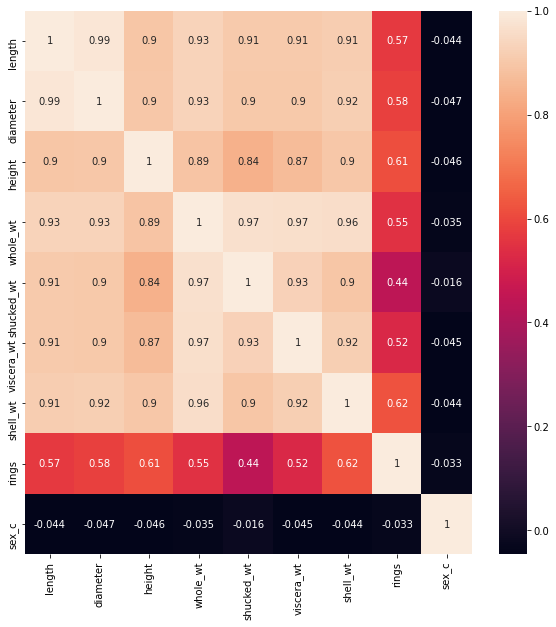

In [24]:
# Check for correlation between variables:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(aba_df.corr(),annot=True)
plt.show()

In [25]:
aba_df[aba_df['sex_c']== 0]['rings'].unique()

array([ 9, 16, 19, 14, 10, 12, 11, 15, 13,  8,  7, 17, 18,  5,  6])

In [26]:
aba_df[aba_df['sex_c']== 1]['rings'].unique()

array([ 7,  8, 10,  5,  4,  6,  9, 12, 13,  3, 11, 14, 16, 17, 18, 15, 19])

In [27]:
aba_df[aba_df['sex_c']== 2]['rings'].unique()

array([15,  7, 10,  9, 11, 12, 18,  8, 13, 14,  6, 19, 17, 16,  5,  4,  3])

In [28]:
aba_df['rings'].min()

aba_df['rings'].max()

aba_df['rings'].value_counts()

9     686
10    625
8     566
11    472
7     391
6     258
12    251
13    199
14    119
5     113
15    102
16     62
17     53
4      49
18     39
19     32
3      10
Name: rings, dtype: int64

In [29]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [30]:
ab_list=aba_df.index
aba_df['bin_rings']=''

for i in ab_list:
  if aba_df['rings'][i] <= 8:
    aba_df['bin_rings'].loc[i]= 0 
  elif 8 < aba_df['rings'][i] <=15:
    aba_df['bin_rings'].loc[i] =1
  else:
    aba_df['bin_rings'].loc[i] =2

aba_df['bin_rings']=aba_df['bin_rings'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/us

In [31]:
aba_df['bin_rings'].dtype

dtype('int64')

In [32]:
aba_df

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,sex_c,bin_rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0,1
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0,1
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0,1


### 3. Create a neural network using keras to predict the outcome of either of these datasets: 
Cardiac Arrhythmia: https://archive.ics.uci.edu/ml/datasets/Arrhythmia 

Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone

In [33]:
import tensorflow
import keras

X = aba_df.drop(['bin_rings','rings'], axis=1)
y = aba_df['bin_rings']
print("X Shape", X.shape)
print("x Shape", y.shape)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

X Shape (4027, 8)
x Shape (4027,)


In [34]:
# Initialize Sequential model
model = tensorflow.keras.models.Sequential()

In [35]:
# Normalize input data
model.add(tensorflow.keras.layers.BatchNormalization(input_shape=(8,)))

In [36]:
model.add(tensorflow.keras.layers.Dense(3,activation='softmax'))


In [37]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), # default from_logits=False
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [38]:
model.fit(X_train,y_train,batch_size=10,verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4895: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


In [40]:
y_pred = model.predict(X_test)
y_pred

array([[0.40925682, 0.442715  , 0.14802822],
       [0.33095002, 0.46432474, 0.2047252 ],
       [0.3694583 , 0.5416725 , 0.08886913],
       ...,
       [0.47544953, 0.33813152, 0.18641898],
       [0.38711226, 0.3815414 , 0.23134634],
       [0.24913666, 0.66095984, 0.08990347]], dtype=float32)

In [42]:
y_pred1 = []
for y in y_pred:
    y_pred1.append(np.argmax(y))
#y_pred1

In [43]:
confusion_matrix(y_test,y_pred1)

array([[200, 115,   0],
       [ 88, 553,   1],
       [  3,  47,   0]])

In [44]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66       315
           1       0.77      0.86      0.82       642
           2       0.00      0.00      0.00        50

    accuracy                           0.75      1007
   macro avg       0.49      0.50      0.49      1007
weighted avg       0.71      0.75      0.73      1007



### 4.	Write another algorithm to predict the same result as the previous question using either KNN or logistic regression

### Logistic Regression

In [45]:
# split data:
X=aba_df.drop(['rings','bin_rings'],axis=1)
y=aba_df['bin_rings'].ravel()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=24)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)


# Standardization:
sc=StandardScaler()
sc.fit_transform(X_train)

X_train shape: (3020, 8)
X_test shape: (1007, 8)


array([[ 0.94699573,  0.94136281,  0.60947719, ...,  0.45367155,
         0.67046922,  1.14913878],
       [ 1.5095476 ,  1.67303587,  1.42910957, ...,  2.19480741,
         2.10661012, -1.29825128],
       [ 1.81246014,  1.77756059,  1.97553116, ...,  2.29262404,
         3.25158822,  1.14913878],
       ...,
       [-0.13483477, -0.05162206, -0.21015519, ...,  0.14065836,
        -0.09678415,  1.14913878],
       [-0.17810799, -0.15614678, -0.07354979, ..., -0.20659065,
        -0.57680933,  1.14913878],
       [ 0.47099031,  0.680051  ,  0.0630556 , ..., -0.01095741,
         0.08027432,  1.14913878]])

In [46]:
# Logistic Regression:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='multinomial',solver='newton-cg')
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_pred

print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

Intercept: 
 [ 3.68831327 -0.50515421 -3.18315906]
Coefficients: 
 [[-1.05439976e+00 -1.96886767e+00 -1.96793492e+00 -2.74104860e+00
   4.84827259e+00 -9.47362397e-01 -4.98780478e+00  1.91734030e-02]
 [ 1.19059206e+00  1.61199925e+00  9.31780804e-01  3.86518768e-02
  -3.33725798e-01  1.50332355e+00  9.74203215e-01  1.90624392e-03]
 [-1.36192297e-01  3.56868418e-01  1.03615412e+00  2.70239672e+00
  -4.51454679e+00 -5.55961152e-01  4.01360156e+00 -2.10796469e-02]]


In [47]:
confusion_matrix(y_test, y_pred)

array([[249, 101,   0],
       [ 66, 535,   0],
       [  2,  54,   0]])

In [48]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))  

Accuracy Score: 0.7785501489572989


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       350
           1       0.78      0.89      0.83       601
           2       0.00      0.00      0.00        56

    accuracy                           0.78      1007
   macro avg       0.52      0.53      0.53      1007
weighted avg       0.74      0.78      0.75      1007



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN :

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
# split data:
X=aba_df.drop(['rings','bin_rings'],axis=1)
y=aba_df['bin_rings'].ravel()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=24)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)


# Standardization:
sc=StandardScaler()
sc.fit_transform(X_train)

X_train shape: (3020, 8)
X_test shape: (1007, 8)


array([[ 0.94699573,  0.94136281,  0.60947719, ...,  0.45367155,
         0.67046922,  1.14913878],
       [ 1.5095476 ,  1.67303587,  1.42910957, ...,  2.19480741,
         2.10661012, -1.29825128],
       [ 1.81246014,  1.77756059,  1.97553116, ...,  2.29262404,
         3.25158822,  1.14913878],
       ...,
       [-0.13483477, -0.05162206, -0.21015519, ...,  0.14065836,
        -0.09678415,  1.14913878],
       [-0.17810799, -0.15614678, -0.07354979, ..., -0.20659065,
        -0.57680933,  1.14913878],
       [ 0.47099031,  0.680051  ,  0.0630556 , ..., -0.01095741,
         0.08027432,  1.14913878]])

In [52]:
def knn_func ():
    knn_list=[]
    for i in range(10,100):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        y_predicted = knn.predict(X_test)
        knn_list.append(knn.score(X_test, y_test))
    return (knn_list)

knn_func()

print("Max accuracy: ",max(knn_func()))

print(np.argmax(knn_func())+1 )

Max accuracy:  0.8053624627606752
15


In [53]:
# applying neighbours that gave max accuracy:

knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)

print(confusion_matrix(y_test,y_predicted))

print(classification_report(y_test, y_predicted))

[[245 105   0]
 [ 43 558   0]
 [  1  54   1]]
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       350
           1       0.78      0.93      0.85       601
           2       1.00      0.02      0.04        56

    accuracy                           0.80      1007
   macro avg       0.88      0.55      0.55      1007
weighted avg       0.81      0.80      0.77      1007



### 5.	Create a neural network using pytorch to predict the same result as question 3.

In [147]:
X = aba_df.drop(['bin_rings','rings'], axis=1)
y = aba_df['bin_rings'].ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

# #Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [148]:
import torch
#import torch.nn as nn
import torch.nn.functional as F #this has activation functions

# Creating tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

print(X_train)

tensor([[ 0.0510, -0.1936, -1.0100,  ..., -0.7092, -0.6508,  1.1713],
        [-0.7199, -0.5563, -0.4683,  ..., -0.7140, -0.7716, -1.2861],
        [-1.1482, -0.9707, -1.0100,  ..., -0.9553, -1.0054,  1.1713],
        ...,
        [-0.9340, -1.0225, -1.2809,  ..., -0.9601, -1.0054, -0.0574],
        [-0.4201, -0.6081, -0.4683,  ..., -1.0855, -0.8105, -0.0574],
        [-0.9340, -1.0743, -0.6037,  ..., -1.1820, -1.1612, -0.0574]])


In [149]:
class ANN_Model(nn.Module):
    def __init__(self, input_features=8, hidden1=20, hidden2=20, out_features =3):
        super().__init__()
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
    
    def forward(self, x):
        #apply activation functions
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [150]:
torch.manual_seed(42)

#instantiate the model
model = ANN_Model()

In [151]:
# loss function
loss_function = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.RMSprop(model.parameters(),lr=0.01)

In [152]:
#run model through multiple epochs/iterations
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)
    
    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss: {loss.item()}')
    
    optimizer.zero_grad() #zero the gradient before running backwards propagation
    loss.backward() #for backward propagation 
    optimizer.step() #performs one optimization step each epoch

Epoch number: 1 with loss: 0.8698174357414246
Epoch number: 11 with loss: 0.5713778138160706
Epoch number: 21 with loss: 0.5314209461212158
Epoch number: 31 with loss: 0.5172082781791687
Epoch number: 41 with loss: 0.4980887770652771
Epoch number: 51 with loss: 0.5043148398399353
Epoch number: 61 with loss: 0.49008530378341675
Epoch number: 71 with loss: 0.48926791548728943
Epoch number: 81 with loss: 0.4849165976047516
Epoch number: 91 with loss: 0.4802626967430115
Epoch number: 101 with loss: 0.4824216663837433
Epoch number: 111 with loss: 0.4762447476387024
Epoch number: 121 with loss: 0.47826945781707764
Epoch number: 131 with loss: 0.4750617742538452
Epoch number: 141 with loss: 0.4766164720058441
Epoch number: 151 with loss: 0.4710017442703247
Epoch number: 161 with loss: 0.4735525846481323
Epoch number: 171 with loss: 0.4715591073036194
Epoch number: 181 with loss: 0.4733105003833771
Epoch number: 191 with loss: 0.4731675386428833
Epoch number: 201 with loss: 0.469065397977829
E

In [153]:
#predictions
y_pred = []

with torch.no_grad():
    for i, data in enumerate(X_test):
        prediction = model(data)
        y_pred.append(prediction.argmax().item())

In [154]:
from sklearn.metrics import accuracy_score
a_score = accuracy_score(y_test, y_pred)
print(a_score)

0.7984111221449851


In [155]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       315
           1       0.80      0.91      0.85       642
           2       0.00      0.00      0.00        50

    accuracy                           0.80      1007
   macro avg       0.53      0.54      0.53      1007
weighted avg       0.76      0.80      0.78      1007



### 6.Compare the performance of the neural networks to the other model you created. Which performed better? Why do you think that is?


|Keras - 0.77|

|Logistic - 0.75 |

|KNN - 0.78 |

|Pytorch - 0.80 |

For KNN and Logistic with some preprocessing and hyper parameter tuning gave an accuracy up to 78. Where as with basic neural network models and no hyper parameter tuning with some preprocessng yielded same results. It is concluded that the with more hyper parameter tuning for neural network models can give good accuracy.